# ANÁLISE DOS ACIDENTES OCORRIDOS EM SÃO PAULO ENTRE 2015 E 2023

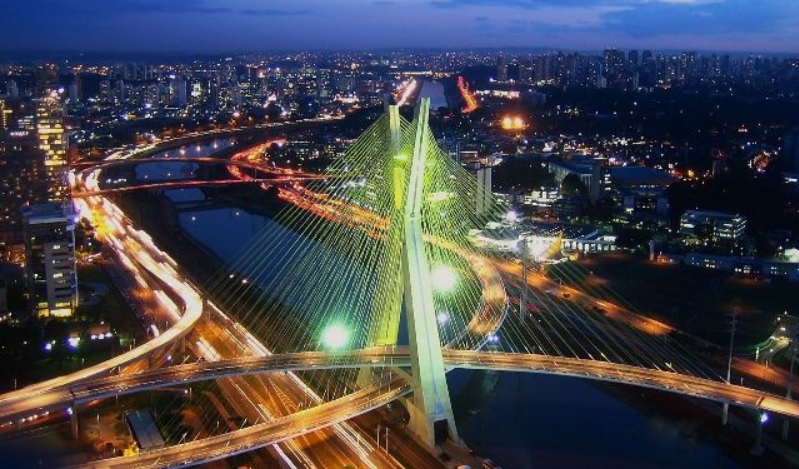

# INTRODUÇÃO

-------------------------------

Muito se tem discutido acerca da problemática de mobilidade urbana em São Paulo (SP). E nesta análise iremos explorar uma parte muito importante nesta questão: **acidentes fatais**

É importante frisar que esse números de morte não são **somente** números, são pessoas, familias, amigos e histórias que hoje estão só nas memórias de seus entes queridos. Gostaria de deixar aqui um apelo à conscientização a respeito dos acidentes que ocorrem no trânsito. 

Quando trabalhamos com dados, tempos uma idéia central da situação em geral, e a importância em tratar, refinar e analisar esses dados a fim de conseguir contribuir promovendo análises e insights importantes para que possamos fomentar novas políticas públicas que visem mitigar **a mortalidade decorrente de acidentes no Estado de São Paulo**.

Neste estudo iremos tentar abordar e aprofundar melhor quais são as vítimas e suas e as caracteristicas dos acidentes. A fim de conseguir promover uma analise que contribua para melhor as políticas públicas do Estado de São Paulo no tangete à acidentes envolvendo veículos automotores.

### Observações
--------------------------------

- Não será abordado a média anual de mortes ocasionadas decorrentes destes acidentes, mas sim a totalidade de mortes que ocorreram nos ultimos cinco anos.

- Afim de tornar um estudo um pouco mais interativo e alternou-se variou-se a cor dos gráficos a fim de tornar uma ánalise mais clara decorrente do tipo de gráfico, as cores majoritariamente usadas são as encontradas nas paletas de cores "deep" do qual o Python disponibiliza.

- A base de dados utilizada se encontra em: [banco de dados de São Paulo 2023](http://www.respeitoavida.sp.gov.br/)


# ANALISANDO OS DADOS 

---------------------------------------------

- A seguir, será importado  as bibliotecas necessárias ao projeto.


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Carregando a base de dados para que seja possível a visualização mais clara:

In [264]:
import chardet

df = pd.read_csv('obitos_publico.csv',encoding = 'latin1', on_bad_lines='skip',sep=';')
df

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
0,40233,1005052997,2023,2023-03-31,2023-03-31,Rodovias,31,3,MARÇO,2023,...,BICICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,TRANSVERSAL,MASCULINO,80 ou mais,84,MOTOCICLETA,Até 30 dias
1,40208,1005059324,2023,2023-03-31,2023-03-31,Rodovias,31,3,MARÇO,2023,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Até 30 dias
2,30212,1005058029,2023,2023-03-31,2023-03-31,Rodovias,31,3,MARÇO,2023,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Até 30 dias
3,120214,1005046947,2023,2023-03-31,2023-03-31,Vias Municipais,31,3,MARÇO,2023,...,MOTOCICLETA,PASSAGEIRO,VIA,CHOQUE,OBJETO NA PISTA,MASCULINO,18-24,21,NÃO HÁ,Até 30 dias
4,30102,1005046072,2023,2023-03-31,2023-03-29,Vias Municipais,31,3,MARÇO,2023,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,FRONTAL,MASCULINO,45-49,47,AUTOMOVEL,Até 30 dias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,70928,15,2015,2015-01-01,2015-01-01,Vias Municipais,1,1,JANEIRO,2015,...,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,MASCULINO,40-44,44,NÃO HÁ,Até 30 dias
45769,70353,677,2015,2015-01-01,2015-01-01,Vias Municipais,1,1,JANEIRO,2015,...,PEDESTRE,PEDESTRE,NAO DISPONIVEL,ATROPELAMENTO,NAO DISPONIVEL,MASCULINO,65-69,66,MOTOCICLETA,Até 30 dias
45770,110325,1,2015,2015-01-01,2015-01-01,Vias Municipais,1,1,JANEIRO,2015,...,AUTOMOVEL,CONDUTOR,VIA,OUTROS,CAPOTAMENTO,MASCULINO,40-44,42,NÃO HÁ,Até 30 dias
45771,70934,9,2015,2015-01-01,2015-01-01,Vias Municipais,1,1,JANEIRO,2015,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,OUTROS,TOMBAMENTO VEÍCULO DE 2 RODAS,MASCULINO,25-29,27,NÃO HÁ,Até 30 dias


- As colunas existenstes bem como seu tipo a fim de indicar os melhores tipos de gráficos para serem ilustrados na análise a seguir.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             45773 non-null  int64  
 1   Número do Bo (RDO)                45773 non-null  int64  
 2   Ano do BO (RDO)                   45773 non-null  int64  
 3   Data do Óbito                     45773 non-null  object 
 4   Data do Acidente                  45773 non-null  object 
 5   Tipo de via                       45773 non-null  object 
 6   Dia do óbito                      45773 non-null  int64  
 7   Mês do Óbito                      45773 non-null  int64  
 8   Mês Óbito Descrição               45773 non-null  object 
 9   Ano do Óbito                      45773 non-null  int64  
 10  Ano/Mês do Óbito                  45773 non-null  float64
 11  Dia da Semana                     45773 non-null  object 
 12  Hora

## REMOÇÃO DE DADOS INDISPONÍVEIS
----------------------------------------------------------

Neste tópico iremos remover os dados indisponíveis a fim de deixar nossa ánalise ainda mais refinada para visualização de números mais próximos da realidade.

In [341]:
df_remove_acidente = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_acidente.index)


In [321]:
df_remove_genero = df.loc[(df['Turno'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

In [322]:
df_remove_genero = df.loc[(df['Tipo de via'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)


In [323]:
df_remove_genero = df.loc[(df['Sexo'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

In [324]:
df_remove_genero = df.loc[(df['Faixa etária'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

In [325]:
df_remove_genero = df.loc[(df['Tipo de vítima'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

In [255]:
df_remove_genero = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

In [340]:
df_remove_sub_acidente = df.loc[(df['Sub Tipo do Acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)

In [433]:
df_remove_sub_acidente = df.loc[(df['Outro Veículo Envolvido'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)

In [436]:


df_remove_sub_acidente = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)

# ANALÍSE EXPLORATÓRIA
----------------------------------------------

Quando analisa-se um problema social existem questionamentos pertinentes a serem respondidos, que normalmente são bem complexos e envolvem diferentes variáveis, os quais afetam inúmeras pessoas. Então, levando em consideração o perfil do nosso conjunto de dados, serão respondidos as seguintes questões:

- Quem?
- Quando?
- Onde?
- Como?

# PERFIL DAS PESSOAS ENVOLVIDAS
---------------------------------------------
É bastante importante abordar o perfil das vitimas envolvidas a fim de refinar a análise e contribuir de maneira ainda mais precisa para políticas públicas e/ou campanhas de conscientização. Observa-se no conjunto de dados que fundamentalmente as informações referentes as vitimas são:

- Gênero
- Idade
- Tipo de vítima
- Veículo utilizados




## GÊNERO
----------------

Neste tópico será abordado com maior clareza o percentual de mortalidade no trânsito entre homens e mulheres. Abordando conceitos como soma geral subidivida em valores por gênero bem como porcentagens dos mesmos, além de gráfico ilustrativo.

### Soma geral de vítimas 

- Abaixo será demostrado o somatório já calculado em porcentagem decorrente dos óbitos subdivididos em gênero.

In [337]:
masc_porc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
femi_porc = sexo['FEMININO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))

Homens: 37192 (80.91%)
Mulheres: 8007 (19.09%)


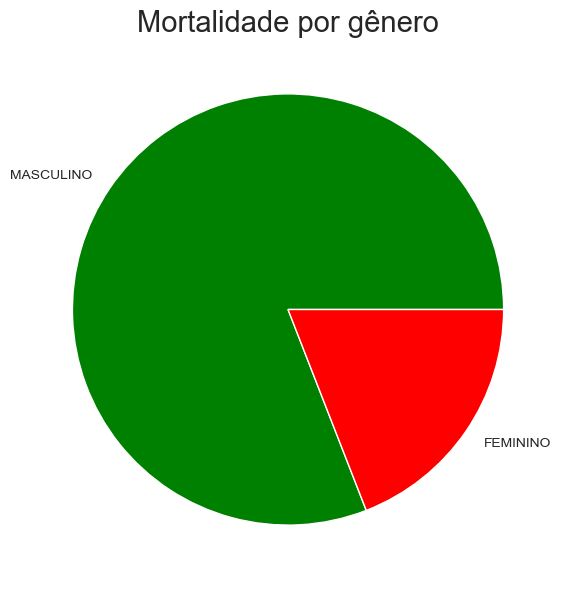

In [394]:
fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
sexo = df['Sexo'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO','FEMININO'],colors='grey')
plt.title('Mortalidade por gênero',fontsize=21);

- Em especifico neste tópico conseguimos entender a relação entre as vítimas envolvidas, tendo uma discrepancia signitificativamente maior de acidentes com homens frente às mulheres.

- É  possivel ainda, identificar o número de homens, sendo eles 37192, o que corresponde a **89,29%** da totalidade frente às 8007 mulheres que correspondem apenas **17,71%**.

## IDADE
-----------------------

 Descreve-se a seguir as faixas etárias como maior incidência a fim de mapear com maior clareza o perfil das vítimas envolvidas nos acidentes.

### Ranking de faixa etárias como maior incidencia de acidentes

- Neste tópico descreve-se a lista das faixas etárias com maior indice de óbitos decorrente de acidentes, sendo ela por ordem descrescente de incidencia.



In [421]:
df['Faixa etária'].value_counts()

18-24         4060
25-29         2639
30-34         2555
35-39         2500
40-44         2256
45-49         2057
50-54         1878
55-59         1644
60-64         1381
0-17          1286
65-69         1103
70-74          875
80 ou mais     855
75-79          691
Name: Faixa etária, dtype: int64

### Taxa de incidencia avaliada em porcentagem

In [422]:
df['Faixa etária'].value_counts()/df['Faixa etária'].value_counts().sum()*100

18-24         15.748642
25-29         10.236618
30-34          9.910784
35-39          9.697440
40-44          8.750970
45-49          7.979054
50-54          7.284717
55-59          6.377036
60-64          5.356866
0-17           4.988363
65-69          4.278510
70-74          3.394104
80 ou mais     3.316524
75-79          2.680372
Name: Faixa etária, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '80 ou mais'),
  Text(1, 0, '45-49'),
  Text(2, 0, '18-24'),
  Text(3, 0, '75-79'),
  Text(4, 0, '70-74'),
  Text(5, 0, '50-54'),
  Text(6, 0, '40-44'),
  Text(7, 0, '25-29'),
  Text(8, 0, '35-39'),
  Text(9, 0, '30-34'),
  Text(10, 0, '55-59'),
  Text(11, 0, '0-17'),
  Text(12, 0, '60-64'),
  Text(13, 0, '65-69')])

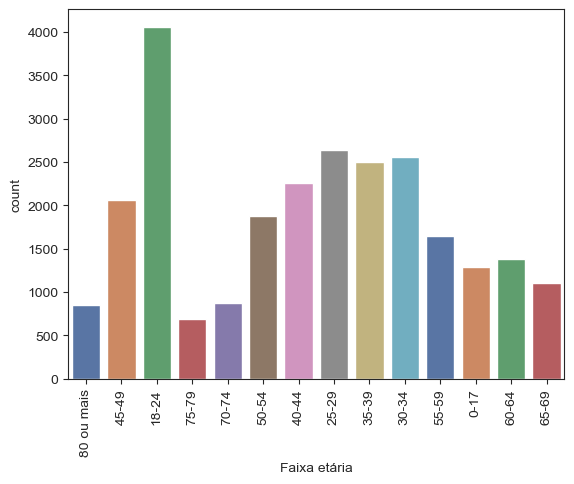

In [378]:

sns.countplot(data=df, x='Faixa etária', palette = 'deep')
plt.xticks(rotation=90)

- Destaca-se a faixa etária entre 18-24 anos dos quais são responsáveis por aproximadamente 15,74% de incidencia como as idades onde maios ocorrem óbitos provenientes de acidentes de transito.


- Seguindo nesta linha, a segunda categoria mais ocorrida são os jovens entre 25-29 anos e em terceiro a categoria de 30-34 anos.


- É possivel concluir com a ánalise feita que os acidentes são inversamente proporcionais a idade, logo a medida em que as pessoas vão envelhencendo os acidentes vão diminuindo, o que denota que a grande maioria de pessoas envolvidas são jovens entre 18-39 anos.


## DATA DOS ACIDENTES

------------------------------

A fim de melhorar ainda mais a análise, descorreremos neste tópico quando ocorreram os acidentes, sendo caracterizado, turno, mês e ano.


### Somatório mensal de óbitos

In [326]:

df['Mês do Óbito'].value_counts()

3     2391
7     2317
8     2275
5     2262
10    2220
9     2162
12    2153
6     2146
4     2054
2     2051
1     2002
11    1747
Name: Mês do Óbito, dtype: int64

### Porcentagem de ocorrência mensais de óbitos 

In [395]:
df['Mês do Óbito'].value_counts()/df['Mês do Óbito'].value_counts().sum()*100

3     9.274631
7     8.987587
8     8.824670
5     8.774244
10    8.611327
9     8.386346
12    8.351435
6     8.324282
4     7.967417
2     7.955780
1     7.765710
11    6.776571
Name: Mês do Óbito, dtype: float64

- O gráfico a seguir ilustra de maneira bem elucidativa a taxa mensal de óbitos.

(1500.0, 2500.0)

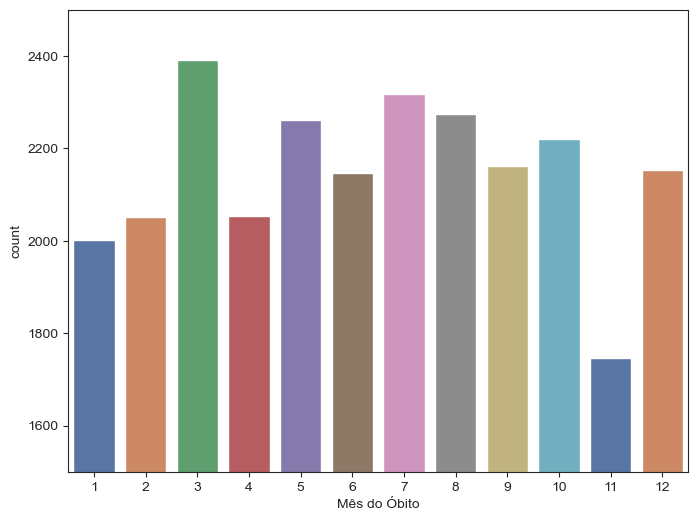

In [376]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Mês do Óbito', palette = 'deep')
plt.ylim(1500,2500)

### Somatório total de óbitos anuais

In [397]:
df['Ano do Óbito'].value_counts()

2016    4222
2015    4166
2017    4163
2019    2828
2018    2654
2022    2597
2020    2341
2021    2189
2023     620
Name: Ano do Óbito, dtype: int64

### Porcentagem de óbitos anuais

In [396]:

df['Ano do Óbito'].value_counts()/df['Ano do Óbito'].value_counts().sum()*100

2016    16.377036
2015    16.159814
2017    16.148177
2019    10.969744
2018    10.294802
2022    10.073701
2020     9.080683
2021     8.491078
2023     2.404965
Name: Ano do Óbito, dtype: float64

<AxesSubplot: xlabel='Ano do Óbito', ylabel='count'>

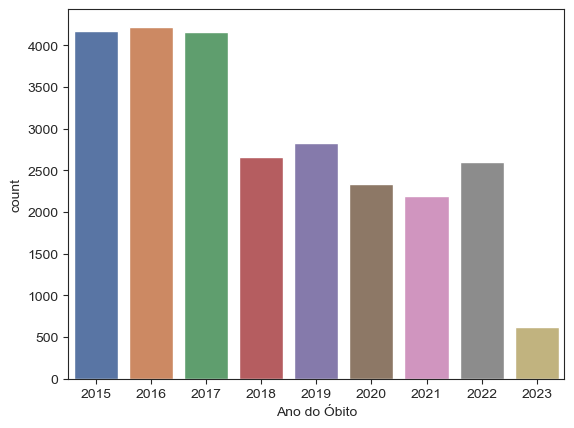

In [374]:
sns.countplot(data=df, x='Ano do Óbito', color='grey',palette = 'deep')

### Somatório total dos óbitos em função dos turnos ocorridos

In [400]:

df['Turno'].value_counts()

NOITE        9737
TARDE        6255
MANHA        5057
MADRUGADA    4731
Name: Turno, dtype: int64

### Porcentagem total de óbitos por turno diário

In [398]:

df['Turno'].value_counts()/df['Turno'].value_counts().sum()*100

NOITE        37.769589
TARDE        24.262995
MANHA        19.615981
MADRUGADA    18.351435
Name: Turno, dtype: float64

(1500.0, 12000.0)

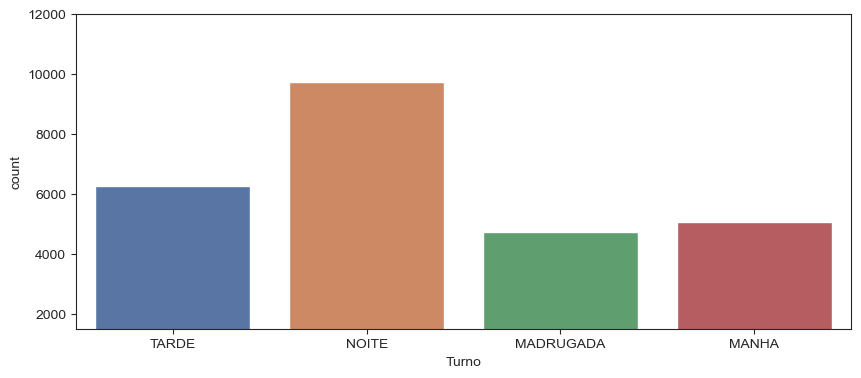

In [371]:
fig = plt.figure(figsize=(10,9))
plt.subplot(2,1,2)
sns.countplot(data=df, x='Turno',palette = 'deep')

plt.ylim(1500,12000)

### TEMPO ENTRE ACIDENTE E ÓBITO

- Neste tópico em espefíco o intuito é entender qual o nivel de gravidade dos acidentes baseando-se até o tempo efetivo de óbito.

### Soma total subdividida em categorias

In [402]:

df['Tempo entre o Acidente e o Óbito'].value_counts()

Até 30 dias        25092
Mais de 30 dias      688
Name: Tempo entre o Acidente e o Óbito, dtype: int64

### Tempo entre acidente e o óbito em porcentagem

In [403]:

df['Tempo entre o Acidente e o Óbito'].value_counts()/df['Tempo entre o Acidente e o Óbito'].value_counts().sum()*100

Até 30 dias        97.331265
Mais de 30 dias     2.668735
Name: Tempo entre o Acidente e o Óbito, dtype: float64

(0.0, 44000.0)

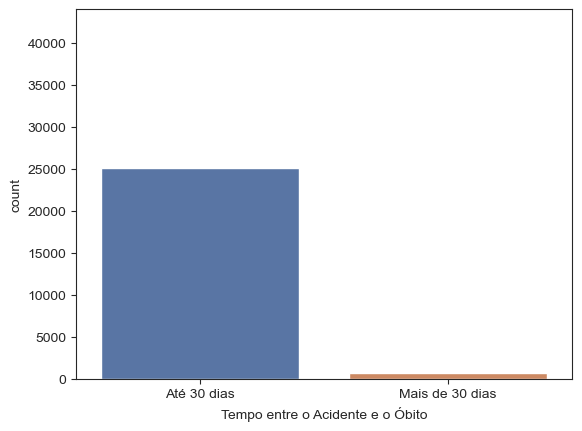

In [404]:

sns.countplot(data=df, x='Tempo entre o Acidente e o Óbito',palette = 'deep')

plt.ylim(0,44000)

## LOCAIS ONDE OCORRERAM OS ACIDENTES
---------------------------------------------------------

Aqui será abordado a correlação entre os locais ocorridos bem como sua frequencia sendo eles subdivididos em:

- Vias munícipais


- Rodovias

### Soma total de óbitos nas vias

In [406]:
df['Tipo de via'].value_counts()

Vias Municipais    13117
Rodovias           12663
Name: Tipo de via, dtype: int64

### Porcentagem de óbitos nas vias

In [405]:
df['Tipo de via'].value_counts()/df['Tipo de via'].value_counts().sum()*100

Vias Municipais    50.880528
Rodovias           49.119472
Name: Tipo de via, dtype: float64

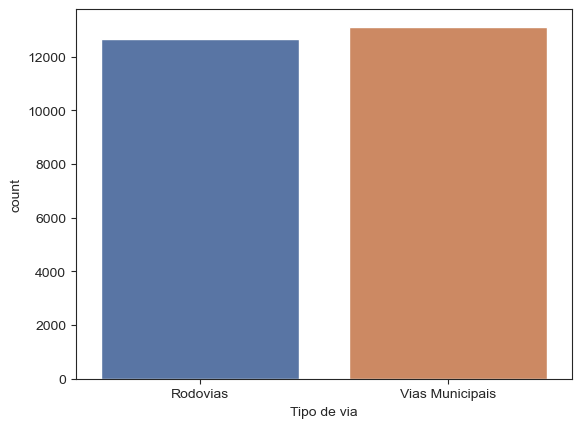

In [369]:
sns.countplot(data=df, x='Tipo de via', color='brown', palette = 'deep')

sns.set_style('ticks')


- Este gráfico representa quantitativamente a relação de maior incidência de acidentes em vias municipais frente às rodovias, o que sugere inicialmente que há maior segurança nas rodovias, deixando uma lacuna aberta quanto as vias municipais a melhor neste aspecto.

## QUAIS MUNICÍPIOS ?
--------------------------------

### Os municípios de Sâo Paulo com mais mortes decorridas de acidentes de trânsito (2015-2023)

In [429]:
df['Município'].value_counts()

SAO PAULO                 4211
CAMPINAS                   654
GUARULHOS                  576
SOROCABA                   422
RIBEIRAO PRETO             397
                          ... 
ARCO-IRIS                    1
OLEO                         1
SAO JOAO DO PAU D ALHO       1
AREIAS                       1
CASSIA DOS COQUEIROS         1
Name: Município, Length: 623, dtype: int64

In [385]:
Municipio_com_mais = df['Município'].value_counts().head(5)
df['Município'].value_counts()/ df['Município'].value_counts().sum()*100


SAO PAULO                 16.334368
CAMPINAS                   2.536850
GUARULHOS                  2.234290
SOROCABA                   1.636928
RIBEIRAO PRETO             1.539953
                            ...    
ARCO-IRIS                  0.003879
OLEO                       0.003879
SAO JOAO DO PAU D ALHO     0.003879
AREIAS                     0.003879
CASSIA DOS COQUEIROS       0.003879
Name: Município, Length: 623, dtype: float64

### TIPO DE VÍTIMAS
---------------------------
Neste tópico será realizado uma análise quantitativa bem como qualitativa do tipo das vítimas envolvidas nos acidentes.
Subidivididas em três categorias :

- Condutor
- Pedestre
- Passageiro

(array([0, 1, 2]),
 [Text(0, 0, 'CONDUTOR'), Text(1, 0, 'PEDESTRE'), Text(2, 0, 'PASSAGEIRO')])

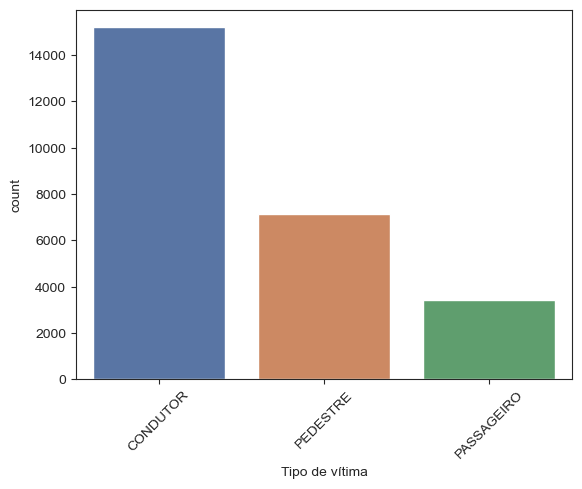

In [380]:

sns.countplot(data=df, x='Tipo de vítima', palette = 'deep')
plt.xticks(rotation=45)

In [426]:
df['Tipo de vítima'].value_counts()

CONDUTOR      15207
PEDESTRE       7134
PASSAGEIRO     3439
Name: Tipo de vítima, dtype: int64

In [425]:
Municipio_com_mais = df['Tipo de vítima'].value_counts().head(5)
df['Tipo de vítima'].value_counts()/ df['Tipo de vítima'].value_counts().sum()*100


CONDUTOR      58.987587
PEDESTRE      27.672614
PASSAGEIRO    13.339798
Name: Tipo de vítima, dtype: float64

- Este gráfico expressa muito bem a relação do tipo das vítimas, os condutores são os maiores responsáveis pelos incidentes seguido dos pedestres e por ultimo a categoria de passageiros.

- Nota-se um número significativo de condutores em relação às outras categorias.

### TIPO DE ACIDENTES E VEÍCULOS UTILIZADOS 
----------------------------------------

### Tipo de acidentes ocorridos

- A fim de apronfudar a análise será classificado o grau de incidencia em função do tipo de acidente ocorrido.

### Soma total

In [428]:
df['Tipo de acidente'].value_counts()

COLISAO          13544
ATROPELAMENTO     7456
CHOQUE            2483
OUTROS            2297
Name: Tipo de acidente, dtype: int64

### Porcentagem total

In [427]:
df['Tipo de acidente'].value_counts()/df['Tipo de acidente'].value_counts().sum()*100

COLISAO          52.536850
ATROPELAMENTO    28.921645
CHOQUE            9.631497
OUTROS            8.910008
Name: Tipo de acidente, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'COLISAO'),
  Text(1, 0, 'ATROPELAMENTO'),
  Text(2, 0, 'OUTROS'),
  Text(3, 0, 'CHOQUE')])

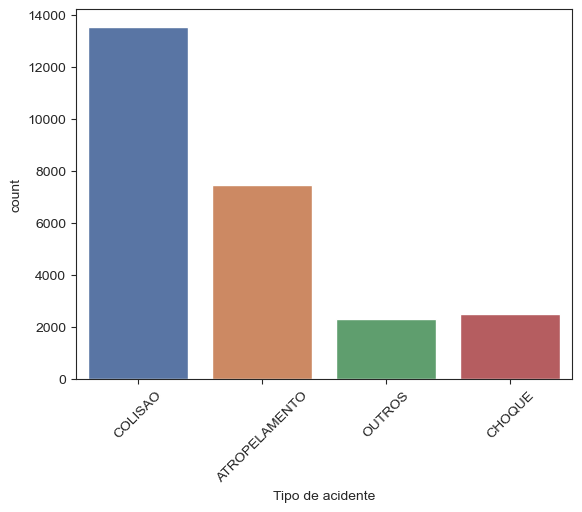

In [382]:
sns.countplot(data=df, x='Tipo de acidente', palette = 'deep')
plt.xticks(rotation=45)




### Soma dos veículos envolvidos

In [437]:
df['Tipo do veículo da vítima'].value_counts()

MOTOCICLETA    8584
PEDESTRE       6885
AUTOMOVEL      6079
BICICLETA      1497
CAMINHAO        798
ONIBUS          242
OUTROS          123
Name: Tipo do veículo da vítima, dtype: int64

## Veículos envolvidos

### Porcentagem dos veículos envolvidos

In [430]:

df['Tipo do veículo da vítima'].value_counts()/df['Tipo do veículo da vítima'].value_counts().sum()*100

MOTOCICLETA       35.682700
PEDESTRE          27.626067
AUTOMOVEL         25.376261
BICICLETA          6.058960
CAMINHAO           3.397983
ONIBUS             0.969744
OUTROS             0.496509
NAO DISPONIVEL     0.391777
Name: Tipo do veículo da vítima, dtype: float64

### Porcentagem total subdividida em categorias

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'BICICLETA'),
  Text(1, 0, 'MOTOCICLETA'),
  Text(2, 0, 'PEDESTRE'),
  Text(3, 0, 'AUTOMOVEL'),
  Text(4, 0, 'CAMINHAO'),
  Text(5, 0, 'ONIBUS'),
  Text(6, 0, 'OUTROS')])

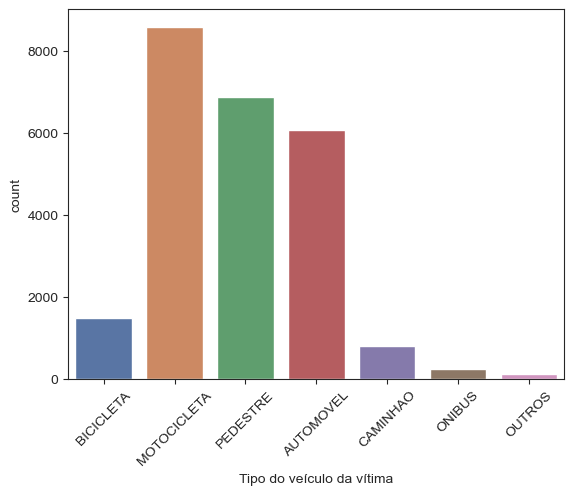

In [438]:

sns.countplot(data=df, x='Tipo do veículo da vítima', palette = 'deep')
plt.xticks(rotation=45)



### Porcentagem de cada veículo envolvido

In [434]:

df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100

AUTOMOVEL      52.227343
CAMINHAO       26.642089
MOTOCICLETA    10.500768
ONIBUS          8.983103
OUTROS          0.964670
BICICLETA       0.442396
PEDESTRE        0.239631
Name: Outro Veículo Envolvido, dtype: float64

### Avaliação detalhada dos tipos de acidentes por porcentagens

- Como descrito anteriormente, neste tópico abordamos a categoria outro e as variáveis ocorridas dentro dessa categoria.

In [342]:
df['Sub Tipo do Acidente'].value_counts()/df['Sub Tipo do Acidente'].value_counts().sum()*100    

FRONTAL                                  23.774026
CRUZANDO A VIA                           17.949280
TRASEIRA                                 16.911496
LATERAL                                  13.315793
TRANSVERSAL                               7.644522
ANDANDO NA VIA / ACOSTAMENTO              5.357012
TOMBAMENTO VEÍCULO DE 2 RODAS             2.967186
VEÍCULO ESTACIONADO                       2.784477
CONDUTOR/PASSAGEIROS FORA DO VEÍCULO      2.053643
NA CALÇADA                                1.739385
ENGAVETAMENTO                             0.811226
CAPOTAMENTO                               0.694292
POSTE                                     0.679676
OUTROS                                    0.665059
DEFENSA / BARREIRA                        0.650442
ANIMAL                                    0.518892
MURO/PAREDE/TALUDE                        0.445809
TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS     0.270409
ÁRVORE                                    0.211942
OBJETO NA PISTA                

# CONCLUSÃO
--------------------------

Com métodos relativamente simples de análises feito neste estudo, é possivel tirar algumas conclusões a respeito dos incidentes envolvendo veículos automotores bem como pedestres entre o ano de 2015 a 2023 a fim de contribuir com a segurança públicas nas ruas de São Paulo.




**Mortalidade por genero**

- homens: 37.192 casos sendo 80,91%
- mulheres: 8.007 casos sendo 19,09%

**Faixa etária (idade)**

 Maiores incidentes:
- 18-24 anos : 4.060 casos sendo 15,74%
- 25-29 anos : 2.639 casos sendo 10.23%
- 30-34 anos : 2.555 casos sendo 9.91%

Ou seja, jovens entre 18-34 anos são mais propensos a sofrerem óbitos decorrente de acidentes com veículos.

**Data dos acidentes**

- Meses de maior incidência : Março, Julho e Agosto.
- Anos com maior incidencias: Percebe-se que no geral o número de acidentes entre 2015-2023 é descrescente ao longo dos anos, embora alguns anos tenham sido átipicos como 2016 ,2019 e 2022 de maneira geral a taxa é cada vez menor, o que denota uma maior conscientização atingida a medida em que o tempo passa.

**Turno de ocorrência**

Vale destacar que a grande maioria dos acidentes ocorrem a noite com 9.737 dos casos ou seja 37.76% dos casos o que sugere uma maior fiscalização por parte do orgão público nos horários em que compreende-se esse turno.

**Tempo de acidente e óbito**

Com acidentes graves com óbito em até 30 dias temos mais de 25 mil casos de ocorrência ou seja 97.33% dos acidentes são graves com óbitos rápidos frente a apenas 688 casos em 8 anos de ánalise ou 2.66% o que implica em afirmar que em grande parte das vezes os acidentes de trânsito são fatais.

**Total de óbitos nas vias**

Neste tópico observamos que os acidentes subdividem-se em duas categorias sendo elas: vias municipais e rodovias, tendo em vista que ambas apresentam indices de mortalidades muito semelhantes, a primeira com 13.117 frente a segunda com 12.663. Ou seja, 50.88% dos acidentes ocorrem em vias municipais e 49.11% em rodovias.

**Munícipios**

A imensa maioria dos casos ocorrem na grande São Paulo sendo eles 4.211 ou 16.33% dos acidentes, destaca-se ainda Campinas e Guarulhos com 2.53% e 2.23% de ocorrências.


**Tipo de vítima**

A imensa maioria dos casos envolvendo óbitos são de condutores, sendo eles responsáveis pelo indice de 58.98% dos casos seguidos por pedestres com 27.67% o que indica que a grande a se dá entre condutores e pedestres.


**Tipo de acidentes e veículos**

Os maiores incidentes são ocorridos com motocicletas as quais correspondem 35.68% seguido de pedestres com 27.62% e automóveis com 25.37%.

A maioria dos acidentes se dá por colisão e atropelamentos responsáveis por mais de 80% dos casos. Geralmente o segundo veículo envolvido é outro carro, caminhão ou motocicleta.

**Sub Tipo do Acidente**

Grande parte dos acidentes são colisões frontais, pessoas atravessando a via, colisões traseiras e laterais. sendo responsáveis por aproximadamente 70% dos casos.


Denota-se a urgência em políticas públicas de fiscalização bem como de conscientização de condutores jovens frente aos acidentes e suas fatalidades a fim de diminuir cada vez mais os indices de óbitos decorrentes de acidentes com veículos automotores.



Fica aqui o apelo aos condutores de responsabilidade a atenção no trânsito e os pêsames às famílias vítimas de violência no trânsito. 
